In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("transactions.csv")

In [3]:
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [4]:
(row, col) = df.shape
print(row, col)

299695 17


In [5]:
df.columns.to_list()

['transaction_id',
 'user_id',
 'account_age_days',
 'total_transactions_user',
 'avg_amount_user',
 'amount',
 'country',
 'bin_country',
 'channel',
 'merchant_category',
 'promo_used',
 'avs_match',
 'cvv_result',
 'three_ds_flag',
 'transaction_time',
 'shipping_distance_km',
 'is_fraud']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

In [7]:
for col_name, dtype in df.dtypes.items():
    if dtype == 'object':
        print(col_name)

country
bin_country
channel
merchant_category
transaction_time


In [8]:
df["country"].unique().tolist()

['FR', 'US', 'TR', 'PL', 'ES', 'IT', 'RO', 'GB', 'NL', 'DE']

In [9]:
df["bin_country"].unique().tolist()

['FR', 'US', 'RO', 'ES', 'TR', 'DE', 'GB', 'IT', 'PL', 'NL']

In [10]:
df["channel"].unique().tolist()

['web', 'app']

In [11]:
df["merchant_category"].unique().tolist()

['travel', 'fashion', 'electronics', 'grocery', 'gaming']

In [12]:
df["transaction_time"].unique().tolist()

['2024-01-06T04:09:39Z',
 '2024-01-09T20:13:47Z',
 '2024-01-12T06:20:11Z',
 '2024-01-15T17:00:04Z',
 '2024-01-17T01:27:31Z',
 '2024-01-26T22:05:08Z',
 '2024-01-30T00:51:41Z',
 '2024-02-11T15:33:30Z',
 '2024-02-22T01:29:55Z',
 '2024-03-09T11:13:19Z',
 '2024-03-10T12:02:42Z',
 '2024-03-19T08:53:32Z',
 '2024-03-20T21:47:22Z',
 '2024-03-28T16:25:31Z',
 '2024-03-29T14:31:42Z',
 '2024-04-13T18:52:52Z',
 '2024-04-13T19:35:10Z',
 '2024-04-23T01:36:46Z',
 '2024-04-23T03:14:45Z',
 '2024-04-24T16:50:11Z',
 '2024-04-28T21:47:34Z',
 '2024-05-01T05:37:49Z',
 '2024-05-19T15:15:03Z',
 '2024-06-05T22:52:12Z',
 '2024-06-06T14:15:51Z',
 '2024-06-27T16:19:42Z',
 '2024-06-28T04:48:24Z',
 '2024-06-29T17:01:32Z',
 '2024-06-30T07:22:51Z',
 '2024-06-30T15:37:34Z',
 '2024-07-03T09:40:50Z',
 '2024-07-06T14:19:40Z',
 '2024-07-07T20:55:59Z',
 '2024-07-17T10:02:01Z',
 '2024-07-21T09:20:25Z',
 '2024-07-27T13:06:33Z',
 '2024-08-12T12:25:01Z',
 '2024-08-30T03:06:16Z',
 '2024-09-05T03:47:26Z',
 '2024-09-10T23:04:23Z',


In [13]:
df['is_fraud'].value_counts()

is_fraud
0    293083
1      6612
Name: count, dtype: int64

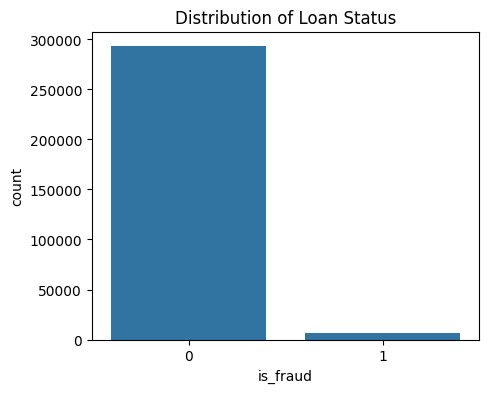

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x=df['is_fraud'])
plt.title("Distribution of Loan Status")
plt.show()


In [15]:
df.describe()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud
count,299695.0000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000
mean,149848.0000,3002.559432,973.397871,50.673321,148.142973,177.165279,0.153640,0.837999,0.872110,0.784588,357.049028,0.022062
std,86514.6388,1732.309663,525.241409,5.976391,200.364624,306.926507,0.360603,0.368453,0.333968,0.411109,427.672074,0.146887
min,1.0000,1.000000,1.000000,40.000000,3.520000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74924.5000,1501.000000,516.000000,46.000000,46.190000,42.100000,0.000000,1.000000,1.000000,1.000000,136.600000,0.000000
50%,149848.0000,3007.000000,975.000000,51.000000,90.130000,89.990000,0.000000,1.000000,1.000000,1.000000,273.020000,0.000000
75%,224771.5000,4504.000000,1425.000000,56.000000,173.450000,191.110000,0.000000,1.000000,1.000000,1.000000,409.180000,0.000000
max,299695.0000,6000.000000,1890.000000,60.000000,4565.290000,16994.740000,1.000000,1.000000,1.000000,1.000000,3748.560000,1.000000


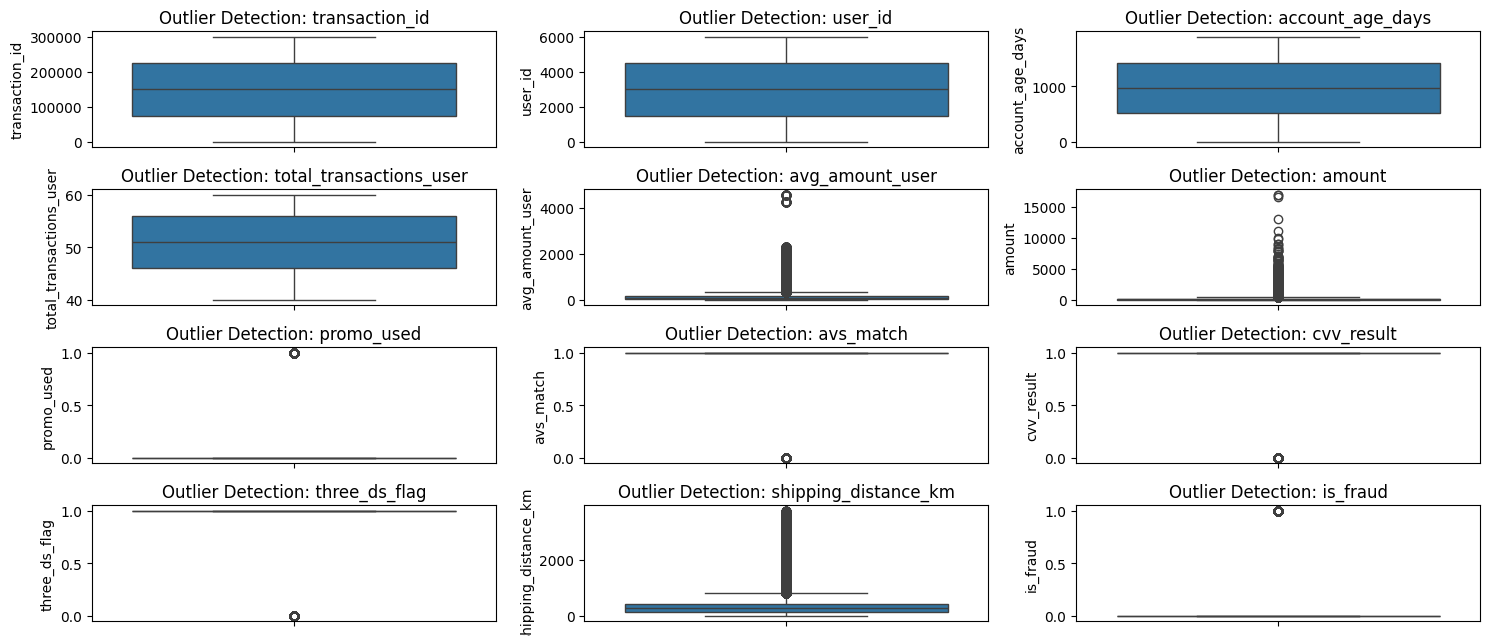

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier Detection: {col}')
 
plt.tight_layout()
plt.show()

In [17]:
def handle_outliers(df):
    clip_cols = ['amount', 'avg_amount_user', 'shipping_distance_km']      
   
    # Apply capping
    for col in clip_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [18]:
df_cleaned = handle_outliers(df)

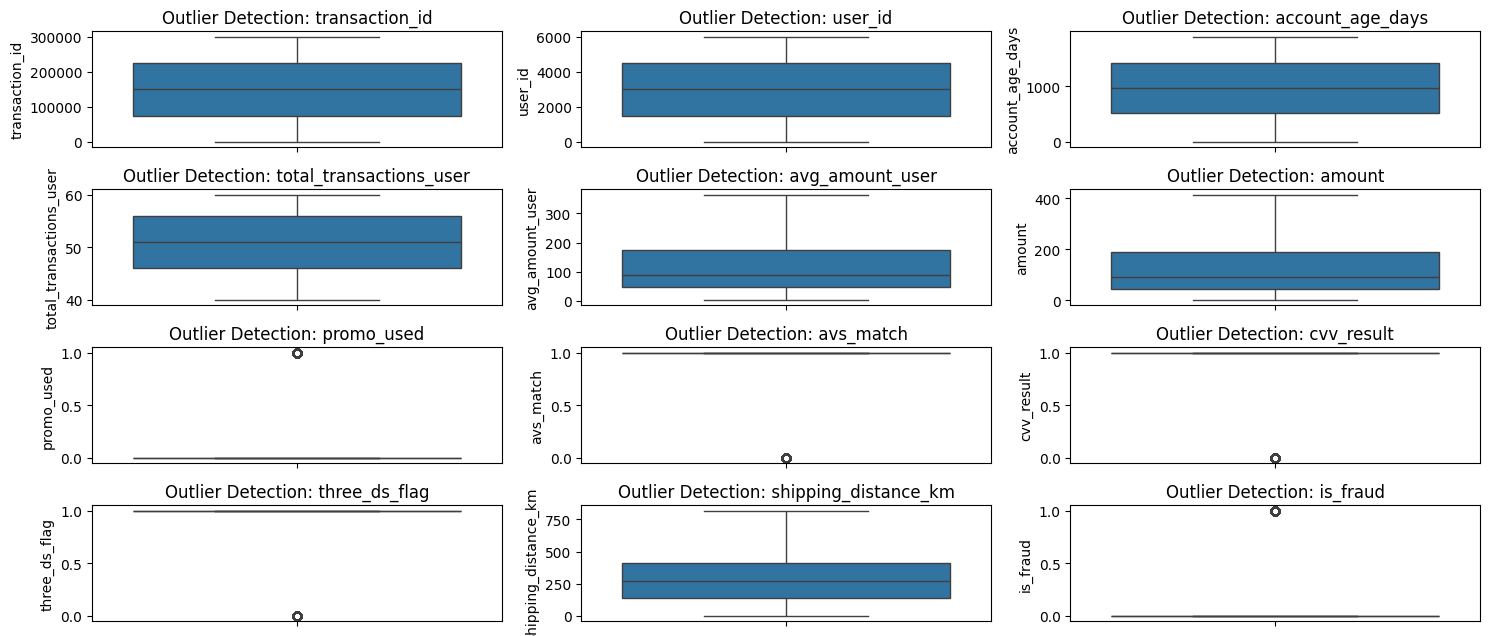

In [19]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Outlier Detection: {col}')
 
plt.tight_layout()
plt.show()

In [20]:
import numpy as np

In [21]:
#columns_to_encode = ['country','bin_country','channel','merchant_category','transaction_time']

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
def encode_transactions(df):    
    # ----- TIME FEATURE EXTRACTION -----
    df['transaction_time'] = pd.to_datetime(df['transaction_time'])

    df['hour'] = df['transaction_time'].dt.hour
    df['day_of_week'] = df['transaction_time'].dt.dayofweek
    df['day'] = df['transaction_time'].dt.day
    df['month'] = df['transaction_time'].dt.month
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

    df.drop(columns=['transaction_time'], inplace=True)

    # ----- CATEGORICAL COLUMNS -----
    categorical_cols = ['country', 'bin_country', 'channel', 'merchant_category']

    # One-Hot Encode
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df


In [24]:
df_encoded = encode_transactions(df)

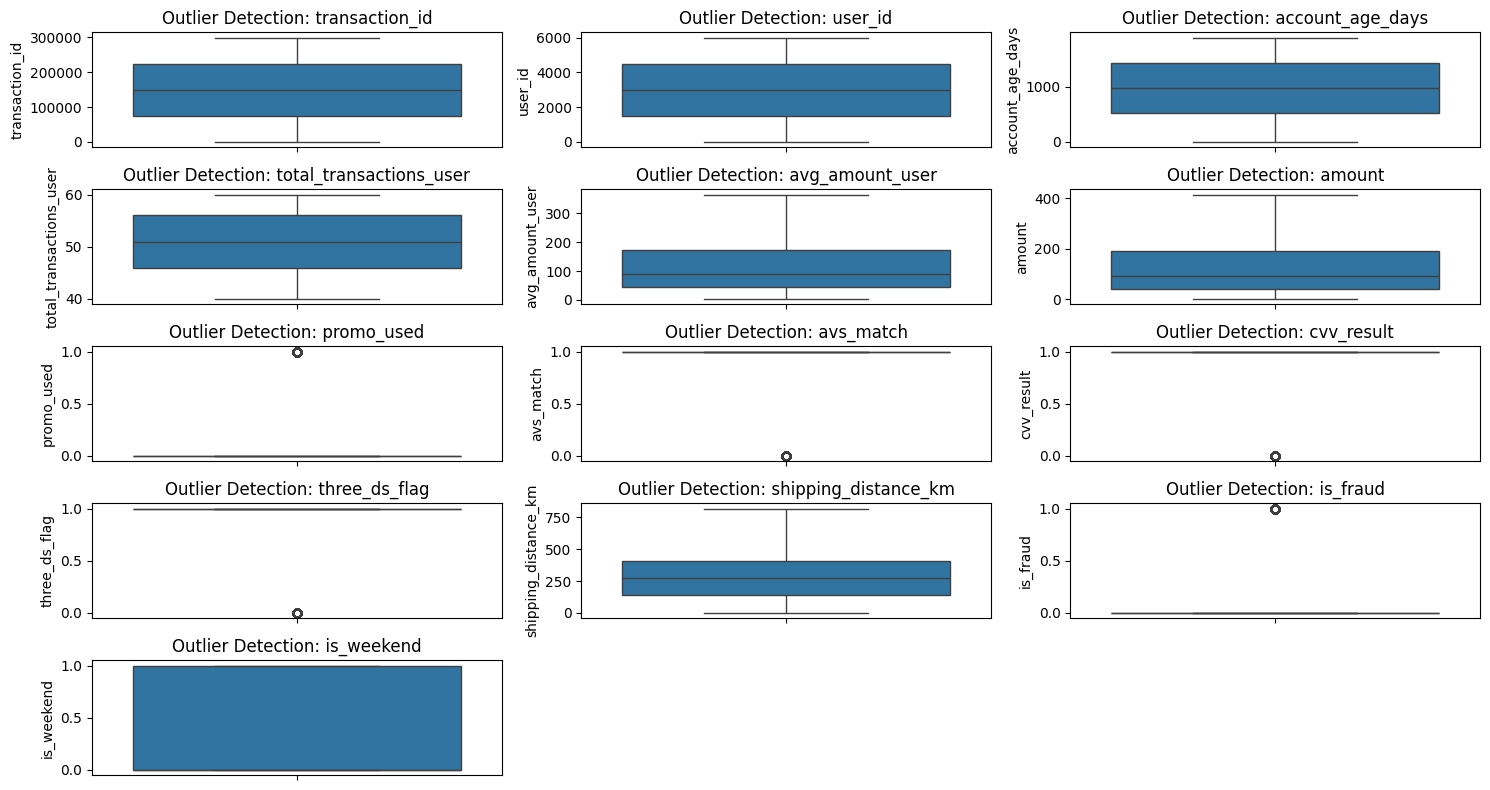

In [25]:
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Outlier Detection: {col}')
 
plt.tight_layout()
plt.show()

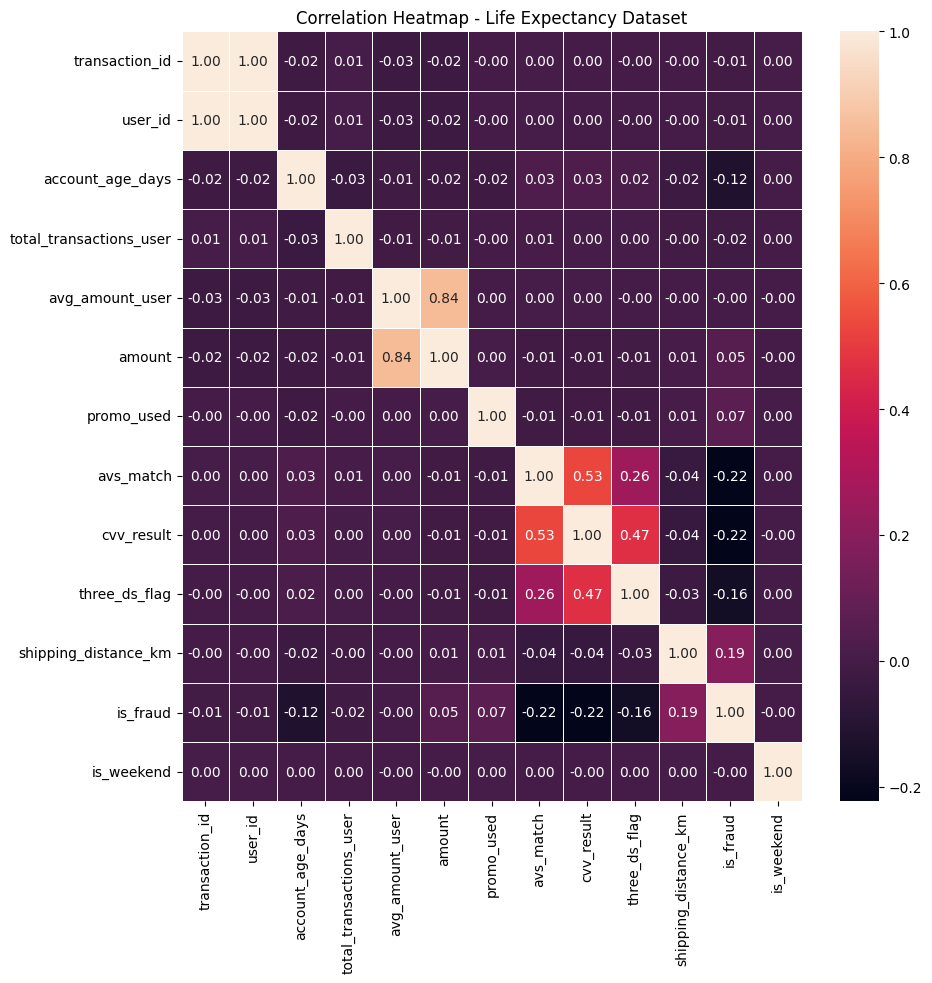

In [26]:
numeric_df = df_encoded.select_dtypes(include = ["float64", "int64"])
corr_mat = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - Life Expectancy Dataset")
plt.show()

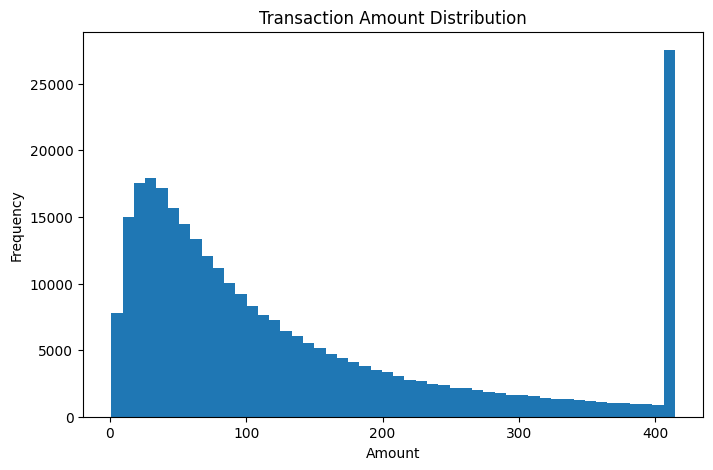

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(df['amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

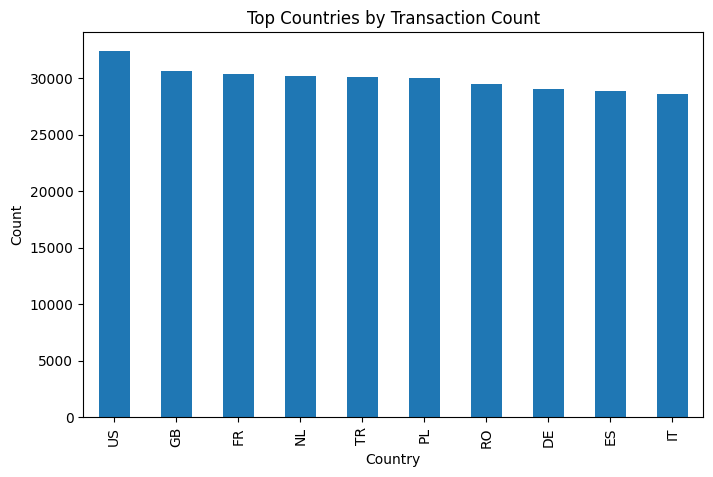

In [28]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top Countries by Transaction Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

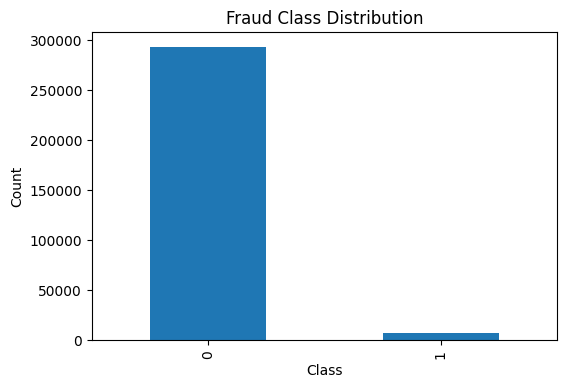

In [29]:
plt.figure(figsize=(6, 4))
df['is_fraud'].value_counts().plot(kind='bar')
plt.title("Fraud Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
from imblearn.over_sampling import SMOTE



# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


After SMOTE: is_fraud
0    234466
1    234466
Name: count, dtype: int64


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    print(f"\n---- {name} ----")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))


---- Logistic Regression ----


c:\Users\devang.sethi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     58617
           1       0.18      0.70      0.29      1322

    accuracy                           0.92     59939
   macro avg       0.59      0.82      0.63     59939
weighted avg       0.97      0.92      0.95     59939


---- Decision Tree ----
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     58617
           1       0.43      0.66      0.52      1322

    accuracy                           0.97     59939
   macro avg       0.71      0.82      0.75     59939
weighted avg       0.98      0.97      0.98     59939


---- Random Forest ----
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58617
           1       0.62      0.67      0.65      1322

    accuracy                           0.98     59939
   macro avg       0.81      0.83      0.82     59939
weighted avg       0.98 

In [62]:
df_test = pd.read_csv("test_transaction.csv")

In [63]:
missing_cols = set(X_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0

In [64]:
df_test = df_test[X_train.columns]

In [65]:
best_model = models["Random Forest"]

In [66]:
test_predictions = best_model.predict(df_test)

In [67]:
print("Predictions on test_transaction.csv:")
print(test_predictions)

Predictions on test_transaction.csv:
[0 0 0 ... 0 0 0]


In [68]:
print("Predictions on test_transaction.csv:")
print(test_predictions)

Predictions on test_transaction.csv:
[0 0 0 ... 0 0 0]


In [69]:
best_model = models["Gradient Boosting"]

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293083 entries, 0 to 293082
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   transaction_id             293083 non-null  int64  
 1   user_id                    293083 non-null  int64  
 2   account_age_days           293083 non-null  int64  
 3   total_transactions_user    293083 non-null  int64  
 4   avg_amount_user            293083 non-null  float64
 5   amount                     293083 non-null  float64
 6   promo_used                 293083 non-null  int64  
 7   avs_match                  293083 non-null  int64  
 8   cvv_result                 293083 non-null  int64  
 9   three_ds_flag              293083 non-null  int64  
 10  shipping_distance_km       293083 non-null  float64
 11  hour                       293083 non-null  int64  
 12  day_of_week                293083 non-null  int64  
 13  day                        29

In [75]:
(x, y) = df_test.shape
print(x, y)

293083 39


In [76]:
df_test.isnull().sum()

transaction_id               0
user_id                      0
account_age_days             0
total_transactions_user      0
avg_amount_user              0
amount                       0
promo_used                   0
avs_match                    0
cvv_result                   0
three_ds_flag                0
shipping_distance_km         0
hour                         0
day_of_week                  0
day                          0
month                        0
is_weekend                   0
country_ES                   0
country_FR                   0
country_GB                   0
country_IT                   0
country_NL                   0
country_PL                   0
country_RO                   0
country_TR                   0
country_US                   0
bin_country_ES               0
bin_country_FR               0
bin_country_GB               0
bin_country_IT               0
bin_country_NL               0
bin_country_PL               0
bin_country_RO               0
bin_coun

In [78]:
if 'Unnamed: 0' in df_test.columns:
    df_test = df_test.drop('Unnamed: 0', axis=1)

In [ ]:
test_predictions

np.float64(0.0005356844306902823)